In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Engineering Student Count Details (College wise - Branch wise).csv')

data['Zone'] = data['Zone'].fillna(method='ffill')

data['Group'] = data['Group'].fillna(method='ffill')

data = data[(data['Category Name'] != 'Architecture') & (data['Category Name'] != 'Affiliated Autonomous')]


#copy data to xdata
xdata = data.copy()
#delete branch from xdata
del xdata['branch']

#merge rows with same college code
xdata = xdata.groupby(['College Code','College Name','Zone','Group','Category Name','University','District']).sum().reset_index()
#delete rows with less than 20 total students or 1st year students
condition1 = xdata['Total No of students'] <= 20
condition2 = xdata['1st year'] <= 20
xdata = xdata[condition1 | condition2]


#delete rows from data where college code is in xdata
data = data[~data['College Code'].isin(xdata['College Code'])]


In [3]:
one_a_data = data.copy()
del one_a_data['branch']
one_a_data = one_a_data.groupby(['College Code','College Name','Zone','Group','Category Name','University','District']).agg({'1st year':'sum', 'Total No of students': 'sum'}).reset_index()
one_a_data = one_a_data.groupby('Zone').agg({'College Code': 'count',  'Total No of students': 'sum', '1st year':'sum'}).reset_index()
one_a_data = one_a_data.rename(columns={'College Code': 'Number of Colleges'})
print("\033[1mNumber of colleges in zone wise with Total No of students and total 1st year students\033[0m")
one_a_data


Number of colleges in zone wise with Total No of students and total 1st year students


,Zone,Number of Colleges,Total No of students,1st year
0,Zone I : Chennai-I,19,20028,5516
1,Zone II : Chennai-II,18,24384,7451
2,Zone III : Chennai-III,16,25465,7227
3,Zone IV : MIT - Chromepet,19,22331,6476
4,Zone IX : Coimbatore - I,27,27981,7814
5,Zone V : Tindivanam,9,7987,2505
6,Zone VI : Arni,13,9418,2604
7,Zone VII : Dharmapuri,14,14469,4240
8,Zone VIII : Salem,27,34868,10087
9,Zone X : Coimbatore - II,14,18479,5486


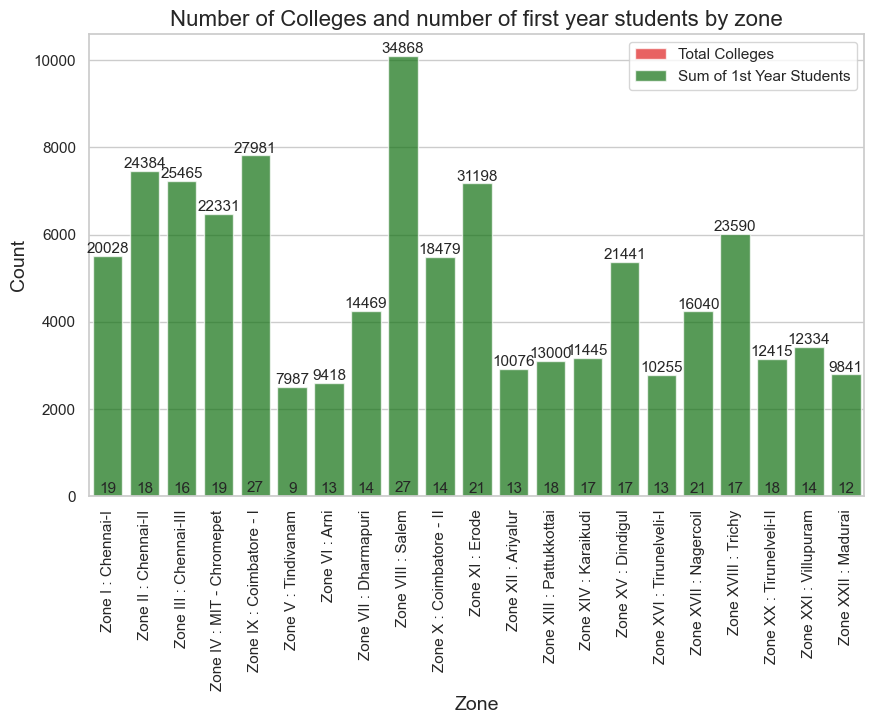

In [4]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(x='Zone', y='Number of Colleges', data = one_a_data, color = 'red', alpha = 0.7, label = 'Total Colleges')
sns.barplot(x='Zone', y='1st year', data = one_a_data, color = 'green', alpha = 0.7, label = 'Sum of 1st Year Students')

ax.set_xlabel('Zone', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_title('Number of Colleges and number of first year students by zone', fontsize = 16)
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type = 'edge', labels = one_a_data.iloc[:, i+1], fontsize = 11)
plt.show()

In [5]:

data.loc[data['branch'].isnull(), 'branch'] = 'Others'
data.loc[:, 'Disciplines'] = 'OTHER'


data.loc[data['branch'].str.contains('computer', case = False), 'Disciplines'] = 'CS'
data.loc[data['branch'].str.contains('Artificial Intelligence', case = False), 'Disciplines'] = 'CS'

data.loc[data['branch'].str.contains('information', case = False), 'Disciplines'] = 'IT'

data.loc[data['branch'].str.contains('mech', case = False), 'Disciplines'] = 'MECH'
data.loc[data['branch'].str.contains('auto', case = False), 'Disciplines'] = 'MECH'

data.loc[data['branch'].str.contains('communication', case = False), 'Disciplines'] = 'ECE'
data.loc[data['branch'].str.contains('electronics', case = False), 'Disciplines'] = 'ECE'

data.loc[data['branch'].str.contains('electrical', case = False), 'Disciplines'] = 'EEE'

data.loc[data['branch'].str.contains('civil', case = False), 'Disciplines'] = 'CIVIL'

data.to_csv('my_dataframe.csv', index=False)



In [6]:
one_b_data = data.groupby(['Zone', 'Disciplines']).size().reset_index(name='count')

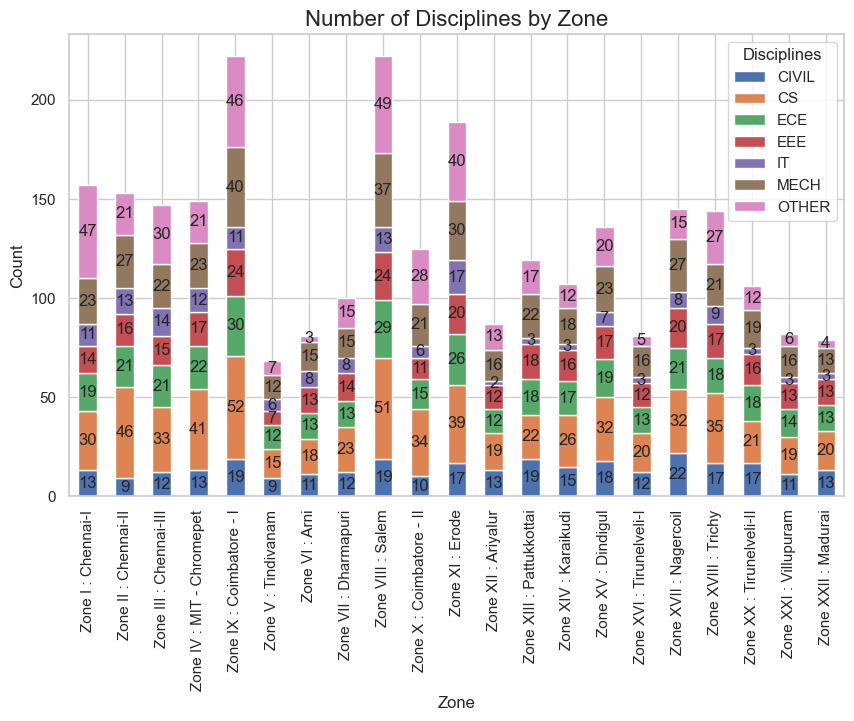

In [7]:
pivoted = one_b_data.pivot(index='Zone', columns='Disciplines', values='count').fillna(0)

ax = pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Zone')
ax.set_ylabel('Count')
ax.set_title('Number of Disciplines by Zone', fontsize = 16)


for i, patch in enumerate(ax.patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2
    count = int(patch.get_height())
    ax.text(x, y, count, ha='center', va='center')

plt.show()

In [8]:
one_c_data = data.groupby('Zone').agg({'College Name': 'nunique', 'Total No of students': 'sum'})

# Compute the maximum and minimum number of colleges and students
max_colleges = one_c_data['College Name'].idxmax()
max_students = one_c_data['Total No of students'].idxmax()
min_colleges = one_c_data['College Name'].idxmin()
min_students = one_c_data['Total No of students'].idxmin()

# Compute the average number of colleges across zones
avg_colleges = one_c_data['College Name'].mean()

# Print the results
print("\033[1mMaximum and minimun stats\033[0m")
print(f"Zone with maximum number of colleges: {max_colleges}")
print(f"Zone with maximum number of students: {max_students}")
print(f"Zone with minimum number of colleges: {min_colleges}")
print(f"Zone with minimum number of students: {min_students}")
print(f"Average number of colleges across zones: {avg_colleges}")

Maximum and minimun stats
Zone with maximum number of colleges: Zone IX : Coimbatore - I
Zone with maximum number of students: Zone VIII : Salem
Zone with minimum number of colleges: Zone V : Tindivanam
Zone with minimum number of students: Zone V : Tindivanam
Average number of colleges across zones: 17.142857142857142


Student density by zone

Zone
Zone I : Chennai-I           1054.105263
Zone II : Chennai-II         1354.666667
Zone III : Chennai-III       1591.562500
Zone IV : MIT - Chromepet    1175.315789
Zone IX : Coimbatore - I     1036.333333
Zone V : Tindivanam           801.100000
Zone VI : Arni                724.461538
Zone VII : Dharmapuri        1033.500000
Zone VIII : Salem            1291.407407
Zone X : Coimbatore - II     1319.928571
Zone XI : Erode              1485.619048
Zone XII : Ariyalur           775.076923
Zone XIII : Pattukkottai      722.222222
Zone XIV : Karaikudi          673.235294
Zone XV : Dindigul           1261.235294
Zone XVI : Tirunelveli-I      788.846154
Zone XVII : Nagercoil         729.136364
Zone XVIII : Trichy          1387.647059
Zone XX : Tirunelveli-II      689.722222
Zone XXI : Villupuram         881.000000
Zone XXII : Madurai           767.538462
dtype: float64


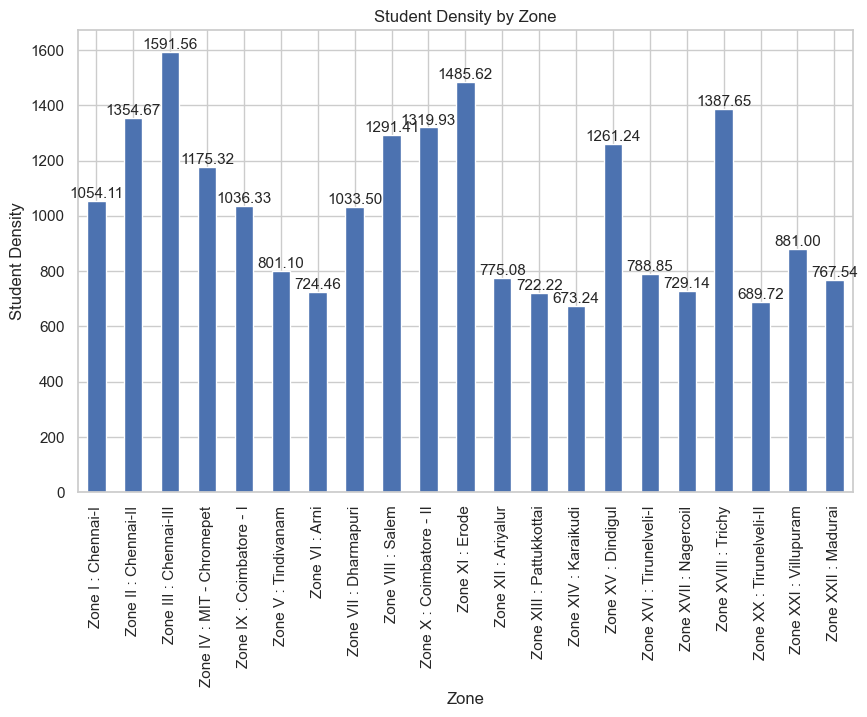

In [9]:
one_d_data = one_c_data['Total No of students'] / one_c_data['College Name']
print("\033[1mStudent density by zone\n\033[0m")
print(one_d_data)

# Display student density as a bar chart
ax = one_d_data.plot(kind='bar', figsize=(10,6))
plt.xlabel('Zone')
plt.ylabel('Student Density')
plt.title('Student Density by Zone')

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', labels=[f"{val:.2f}" for val in one_d_data], fontsize=11)

plt.show()


In [10]:
zones = data['Zone'].unique()

print("\033[1mHistogram for number of students in each zone(bin size = 20)\033[0m")
def plot_graph(zone):
    zone_data = data[data['Zone'] == zone]
    plt.figure(figsize=(12, 6))
    plt.hist([zone_data['Total No of students'], zone_data['1st year']], bins=20, alpha=0.5, label=['Total Students', '1st Year'])
    plt.title(f'Histogram for Zone {zone}')
    plt.xlabel('Number of Students')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

zone_dropdown1 = widgets.Dropdown(options=zones, description='Select Zone:')
output1 = widgets.Output()

def on_change1(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output1:
            output1.clear_output()
            plot_graph(change['new'])

zone_dropdown1.observe(on_change1)

display(zone_dropdown1)
display(output1)

Histogram for number of students in each zone(bin size = 20)


Dropdown(description='Select Zone:', options=('Zone I : Chennai-I', 'Zone II : Chennai-II', 'Zone III : Chenna…

Output()

In [11]:
two_b_data = data.groupby(['College Name', 'Zone', 'Disciplines']).agg({'Total No of students':'sum'}).reset_index()

In [12]:
# pivot the data to create a stacked bar chart
pivot_data = two_b_data.pivot(index='College Name', columns='Disciplines', values='Total No of students')

print("\033[1mNumber of students by department in each college\033[0m")
# define a function to update the chart based on the selected zone
def update_chart(zone_name):
    zone_data = two_b_data.loc[two_b_data['Zone'] == zone_name]
    pivot_data = zone_data.pivot(index='College Name', columns='Disciplines', values='Total No of students')
    pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Total Number of Students by Department and College for Zone ' + zone_name)
    plt.xlabel('College Name')
    plt.ylabel('Number of Students')
    plt.show()



zone_dropdown2 = widgets.Dropdown(options=zones, description='Select Zone:')
output2 = widgets.Output()

def on_change22(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output2:
            output2.clear_output()
            update_chart(change['new'])

zone_dropdown2.observe(on_change22)

display(zone_dropdown2)
display(output2)

Number of students by department in each college


Dropdown(description='Select Zone:', options=('Zone I : Chennai-I', 'Zone II : Chennai-II', 'Zone III : Chenna…

Output()

In [13]:
two_c_data = data.groupby(['Zone', 'Disciplines']).agg({'Total No of students':'sum', '1st year':'sum'}).reset_index()


In [14]:
print("\033[1mTotal number of students and first year students in a discipline by zone\033[0m")
# Define a function to update the histogram based on the selected zone
def update_histogram(zone):
    # Filter the data by the selected zone
    zone_data = two_c_data[two_c_data['Zone'] == zone]
    
    # Group the data by discipline and sum the total number of students
    discipline_data = zone_data.groupby('Disciplines')['Total No of students'].sum()
    
    # Create a bar plot with the number of students on the y-axis and the discipline on the x-axis
    plt.bar(discipline_data.index, discipline_data.values)
    
    # Add labels to the plot
    plt.xlabel('Discipline')
    plt.ylabel('Number of Students')
    plt.title(f'Number of Students in Each Discipline for Zone {zone}')
    
    # Show the plot
    plt.show()
    
def update_histogram1(zone):
    # Filter the data by the selected zone
    zone_data = two_c_data[two_c_data['Zone'] == zone]
    
    # Group the data by discipline and sum the total number of students
    discipline_data = zone_data.groupby('Disciplines')['1st year'].sum()
    
    # Create a bar plot with the number of students on the y-axis and the discipline on the x-axis
    plt.bar(discipline_data.index, discipline_data.values)
    
    # Add labels to the plot
    plt.xlabel('Discipline')
    plt.ylabel('Number of Students')
    plt.title(f'Number of 1st year Students in Each Discipline for Zone {zone}')
    
    # Show the plot
    plt.show()

zone_dropdown3 = widgets.Dropdown(options=zones, description='Select Zone:')
output3 = widgets.Output()

def on_change3(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output3:
            output3.clear_output()
            update_histogram(change['new'])
            update_histogram1(change['new'])

zone_dropdown3.observe(on_change3)

display(zone_dropdown3)
display(output3)


Total number of students and first year students in a discipline by zone


Dropdown(description='Select Zone:', options=('Zone I : Chennai-I', 'Zone II : Chennai-II', 'Zone III : Chenna…

Output()

In [15]:
print("\033[1mNumber of students and first year students in a discipline by College wise\033[0m")

three_data = data.groupby(['College Name', 'Zone', 'Disciplines']).agg({'Total No of students':'sum', '1st year':'sum'}).reset_index()
# create dropdown widgets for selecting zone and college
zone_dropdown = widgets.Dropdown(options=three_data['Zone'].unique(), description='Zone')
college_dropdown = widgets.Dropdown(description='College')

# define a function to update the college dropdown options based on the selected zone
def update_college_options(*args):
    selected_zone = zone_dropdown.value
    college_dropdown.options = three_data[three_data['Zone'] == selected_zone]['College Name'].unique()

# call the update_college_options function when the zone dropdown value changes
zone_dropdown.observe(update_college_options, 'value')

# define a function to update the histogram based on the selected college
def update_histogram10(*args):
    selected_college = college_dropdown.value
    college_data = three_data[three_data['College Name'] == selected_college]
    discipline_data = college_data.groupby('Disciplines').agg({'Total No of students':'sum', '1st year':'sum'})
    
    # clear the previous plot
    output10.clear_output(wait=True)
    
    # create a new plot
    with output10:
        fig, ax = plt.subplots(2, 1, figsize=(8, 8))
        
        # plot the total number of students
        total_bars = ax[0].bar(discipline_data.index, discipline_data['Total No of students'])
        ax[0].set_xlabel('Disciplines')
        ax[0].set_ylabel('Total Number of students')
        ax[0].set_title('Number of students in each discipline at ' + selected_college)
        
        # add text annotations for total number of students
        for i, bar in enumerate(total_bars):
            ax[0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')
        
        # plot the number of 1st year students
        firstyear_bars = ax[1].bar(discipline_data.index, discipline_data['1st year'])
        ax[1].set_xlabel('Disciplines')
        ax[1].set_ylabel('Number of 1st year students')
        ax[1].set_title('Number of 1st year students in each discipline at ' + selected_college)
        
        # add text annotations for number of 1st year students
        for i, bar in enumerate(firstyear_bars):
            ax[1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()

# initialize the output widget
output10 = widgets.Output()

# define a function to handle changes to the college dropdown value
def on_change10(change):
    if change.get('type') == 'change' and change.get('name') == 'value':
        update_histogram10(change['new'])

# call the on_change10 function when the college dropdown value changes
college_dropdown.observe(on_change10)

# display the zone and college dropdown widgets
display(zone_dropdown)
display(college_dropdown)

# display the output widget
display(output10)


Number of students and first year students in a discipline by College wise


Dropdown(description='Zone', options=('Zone I : Chennai-I', 'Zone XXI : Villupuram', 'Zone XIII : Pattukkottai…

Dropdown(description='College', options=(), value=None)

Output()

In [16]:
# Calculate the number of zones with total number of students set as a bins with size of 50
bins = range(0, max(one_a_data['Total No of students']) + 50, 50)
zone_counts, bin_edges = pd.cut(one_a_data['Total No of students'], bins=bins, include_lowest=True, right=False, retbins=True)
zone_counts = zone_counts.value_counts(sort=False)
zone_counts = zone_counts[zone_counts != 0]
# Print the result
zone_counts
# Convert zone_counts Series to DataFrame
zone_counts_df = zone_counts.to_frame().reset_index()
# Rename the columns of the DataFrame
zone_counts_df.columns = ['Bin Labels', 'Counts']
# Print the resulting DataFrame
zone_counts_df


,Bin Labels,Counts
0,"[7950, 8000)",1
1,"[9400, 9450)",1
2,"[9800, 9850)",1
3,"[10050, 10100)",1
4,"[10250, 10300)",1
5,"[11400, 11450)",1
6,"[12300, 12350)",1
7,"[12400, 12450)",1
8,"[13000, 13050)",1
9,"[14450, 14500)",1


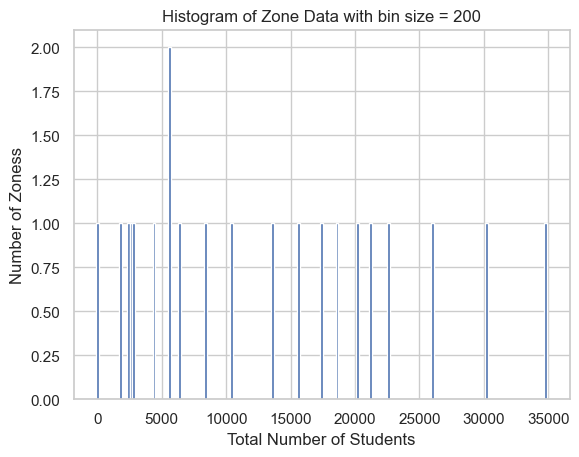

In [28]:
import math
# Group the data by college name and sum the total number of students for each college
college_data = data.groupby('Zone').agg({'Total No of students': 'sum'}).reset_index()

# Sort the data by total number of students in ascending order
college_data = college_data.sort_values(by='Total No of students')

# Define the bin size for the histogram
bin_size = 200

# Calculate the number of bins needed based on the maximum number of students
max_students = college_data['Total No of students'].max()
num_bins = math.ceil(max_students / bin_size)

# Create a new DataFrame with the counts of colleges in each bin
bin_counts = pd.cut(college_data['Total No of students'], bins=num_bins, labels=False).value_counts().sort_index()
bin_counts.index *= bin_size  # Convert bin index to bin range

# Plot the histogram
plt.bar(bin_counts.index, bin_counts.values, width=bin_size)
plt.xlabel('Total Number of Students')
plt.ylabel('Number of Zoness')
plt.title('Histogram of Zone Data with bin size = ' + str(bin_size))
plt.show()


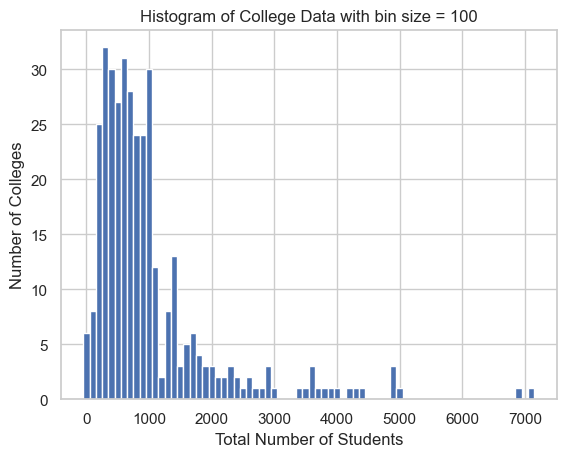

In [29]:

# Group the data by college name and sum the total number of students for each college
college_data = data.groupby('College Name').agg({'Total No of students': 'sum'}).reset_index()

# Sort the data by total number of students in ascending order
college_data = college_data.sort_values(by='Total No of students')

# Define the bin size for the histogram
bin_size = 100

# Calculate the number of bins needed based on the maximum number of students
max_students = college_data['Total No of students'].max()
num_bins = math.ceil(max_students / bin_size)

# Create a new DataFrame with the counts of colleges in each bin
bin_counts = pd.cut(college_data['Total No of students'], bins=num_bins, labels=False).value_counts().sort_index()
bin_counts.index *= bin_size  # Convert bin index to bin range

# Plot the histogram
plt.bar(bin_counts.index, bin_counts.values, width=bin_size)
plt.xlabel('Total Number of Students')
plt.ylabel('Number of Colleges')
plt.title('Histogram of College Data with bin size = ' + str(bin_size))
plt.show()
